# Converting the buried contact reflectance into refractive index

In [1]:
import funcs

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

deg = np.pi/180. # conversion factor degrees to radians

In [2]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
nkDir     = workDir+'nk/'
datapath  = 'data/'

In [3]:
# initialize wavelength scale and refractive indeces
wav = {'1A':np.linspace(4.8,5.8,10000),'1B':np.linspace(5.6,6.7,10000)}
n_ZnS,n_Si,n_BE,n_SiAs,n_Al = [{} for i in range(5)]
for band in wav.keys():
    n_ZnS[band]  = funcs.indexOfRefractionZnS(wav[band])
    n_Si[band]   = funcs.indexOfRefractionSi(wav[band])
    n_BE[band]   = funcs.indexOfRefractionBE(wav[band])
    n_SiAs[band] = funcs.indexOfRefractionSiAs(wav[band])
    n_Al[band] = funcs.indexOfRefractionAl(wav[band])

<IPython.core.display.Javascript object>


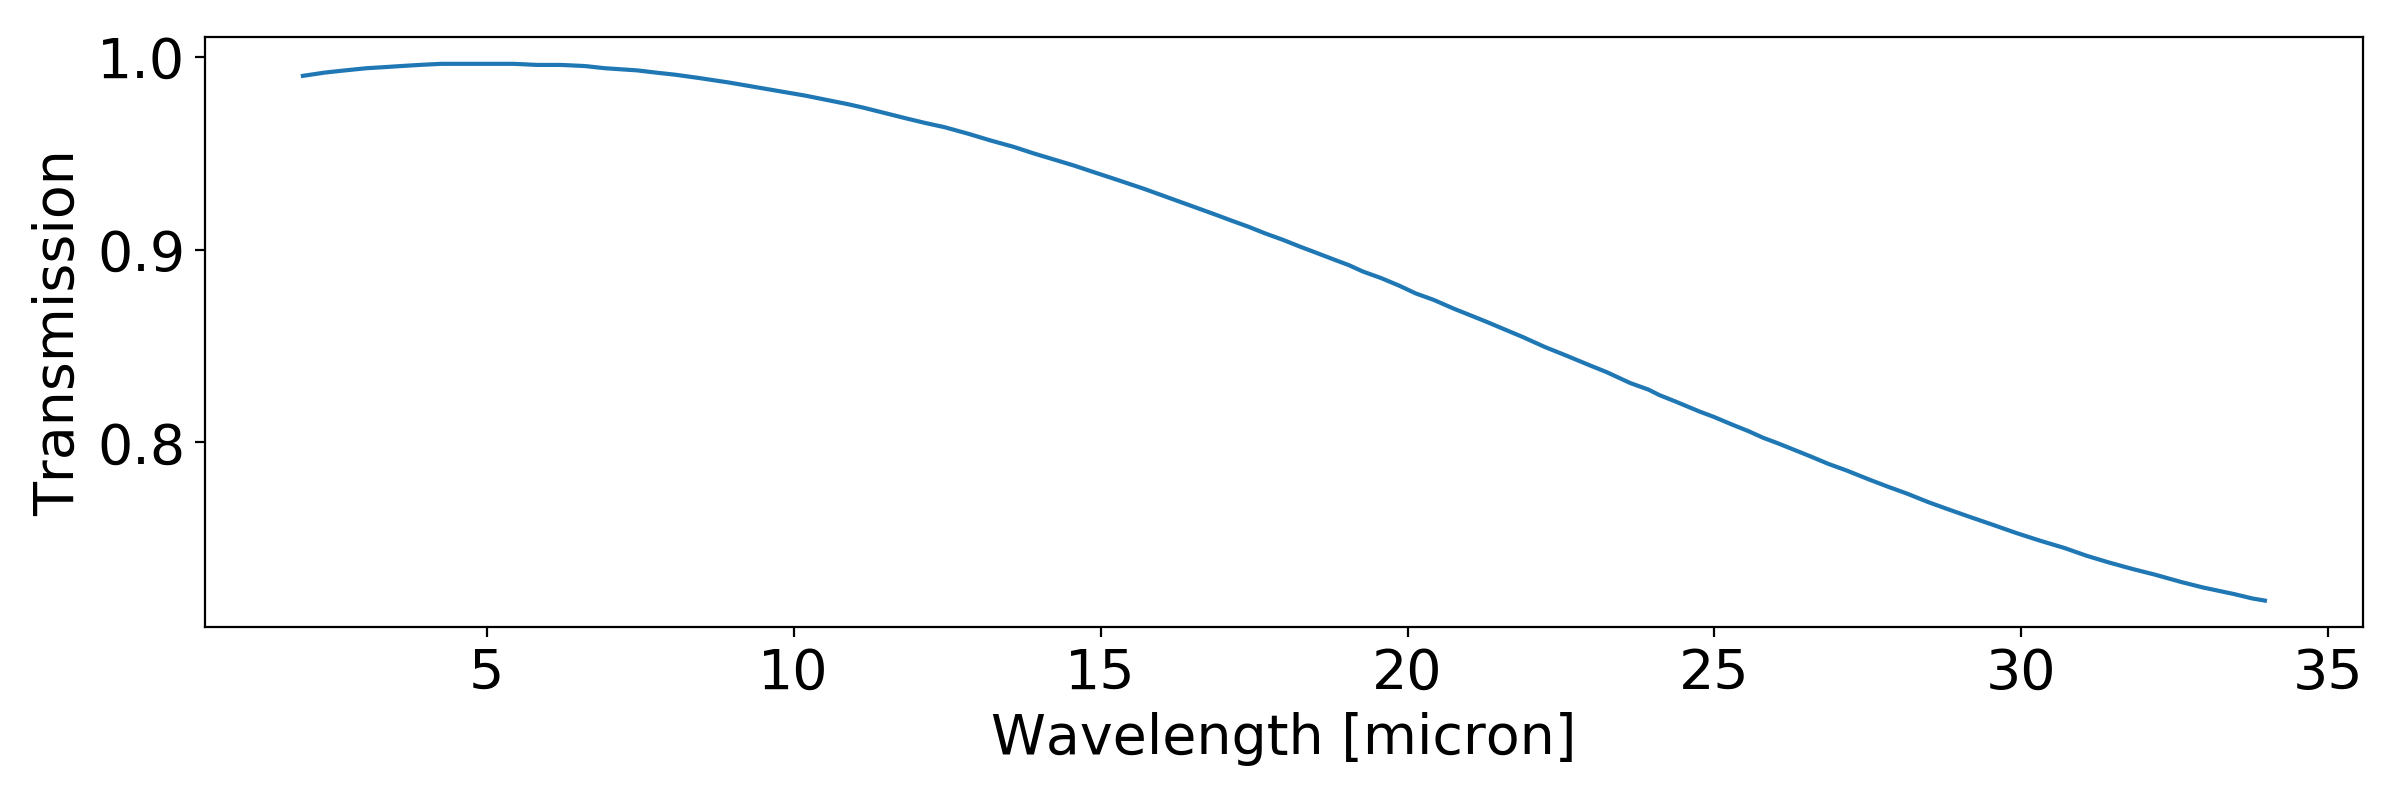

In [4]:
wav_data,transmission = funcs.buriedelectrode_transmission(workDir=workDir)

plt.figure(figsize=(12,4))
plt.plot(wav_data,transmission)
plt.xlabel('Wavelength [micron]')
plt.ylabel('Transmission')
plt.legend(loc='upper left',fontsize=12)
plt.tight_layout()

<IPython.core.display.Javascript object>


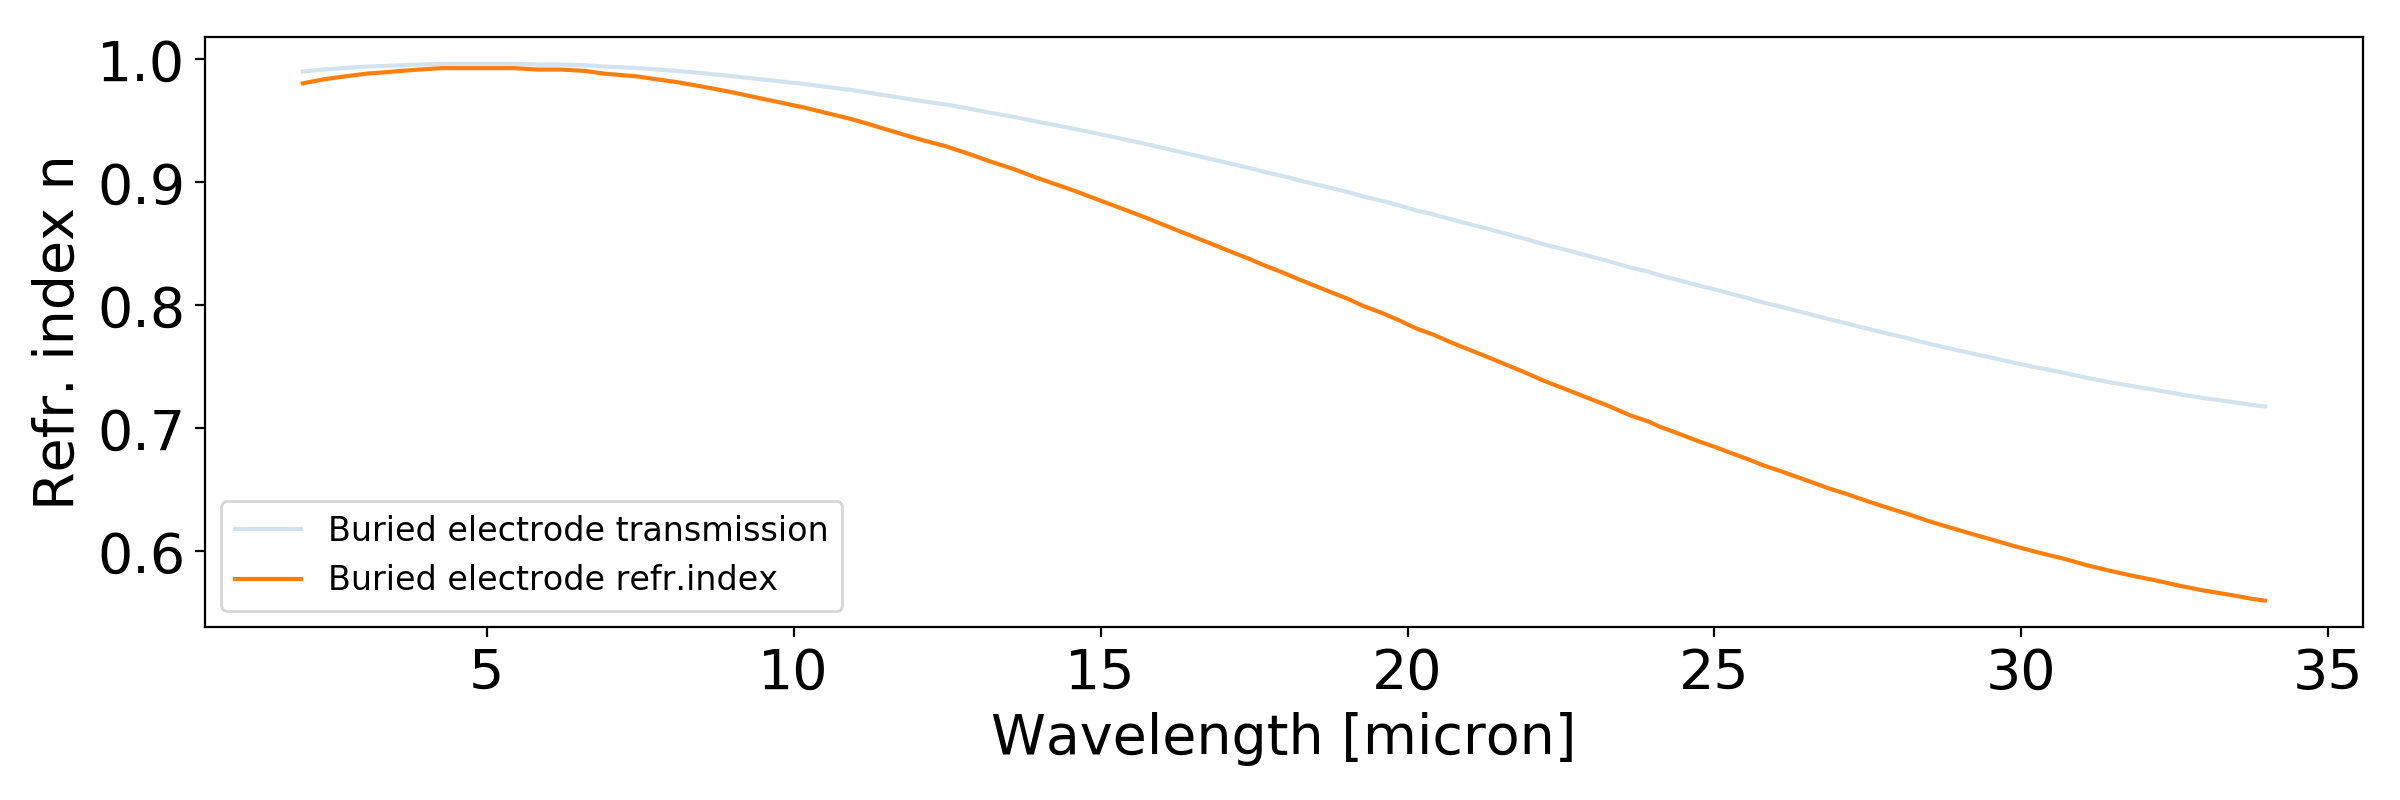

In [8]:
# Assuming:
# n1 = 1
# incidence_angle = 0 deg
# absorption = 0

reflection  = 1-transmission
n2 = (1.-reflection)/(reflection+1.)

plt.figure(figsize=(12,4))
plt.plot(wav_data,transmission,alpha=0.2,label='Buried electrode transmission')
plt.plot(wav_data,n2,label='Buried electrode refr.index')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Refr. index n')
plt.legend(loc='lower left',fontsize=12)
plt.tight_layout()

<IPython.core.display.Javascript object>


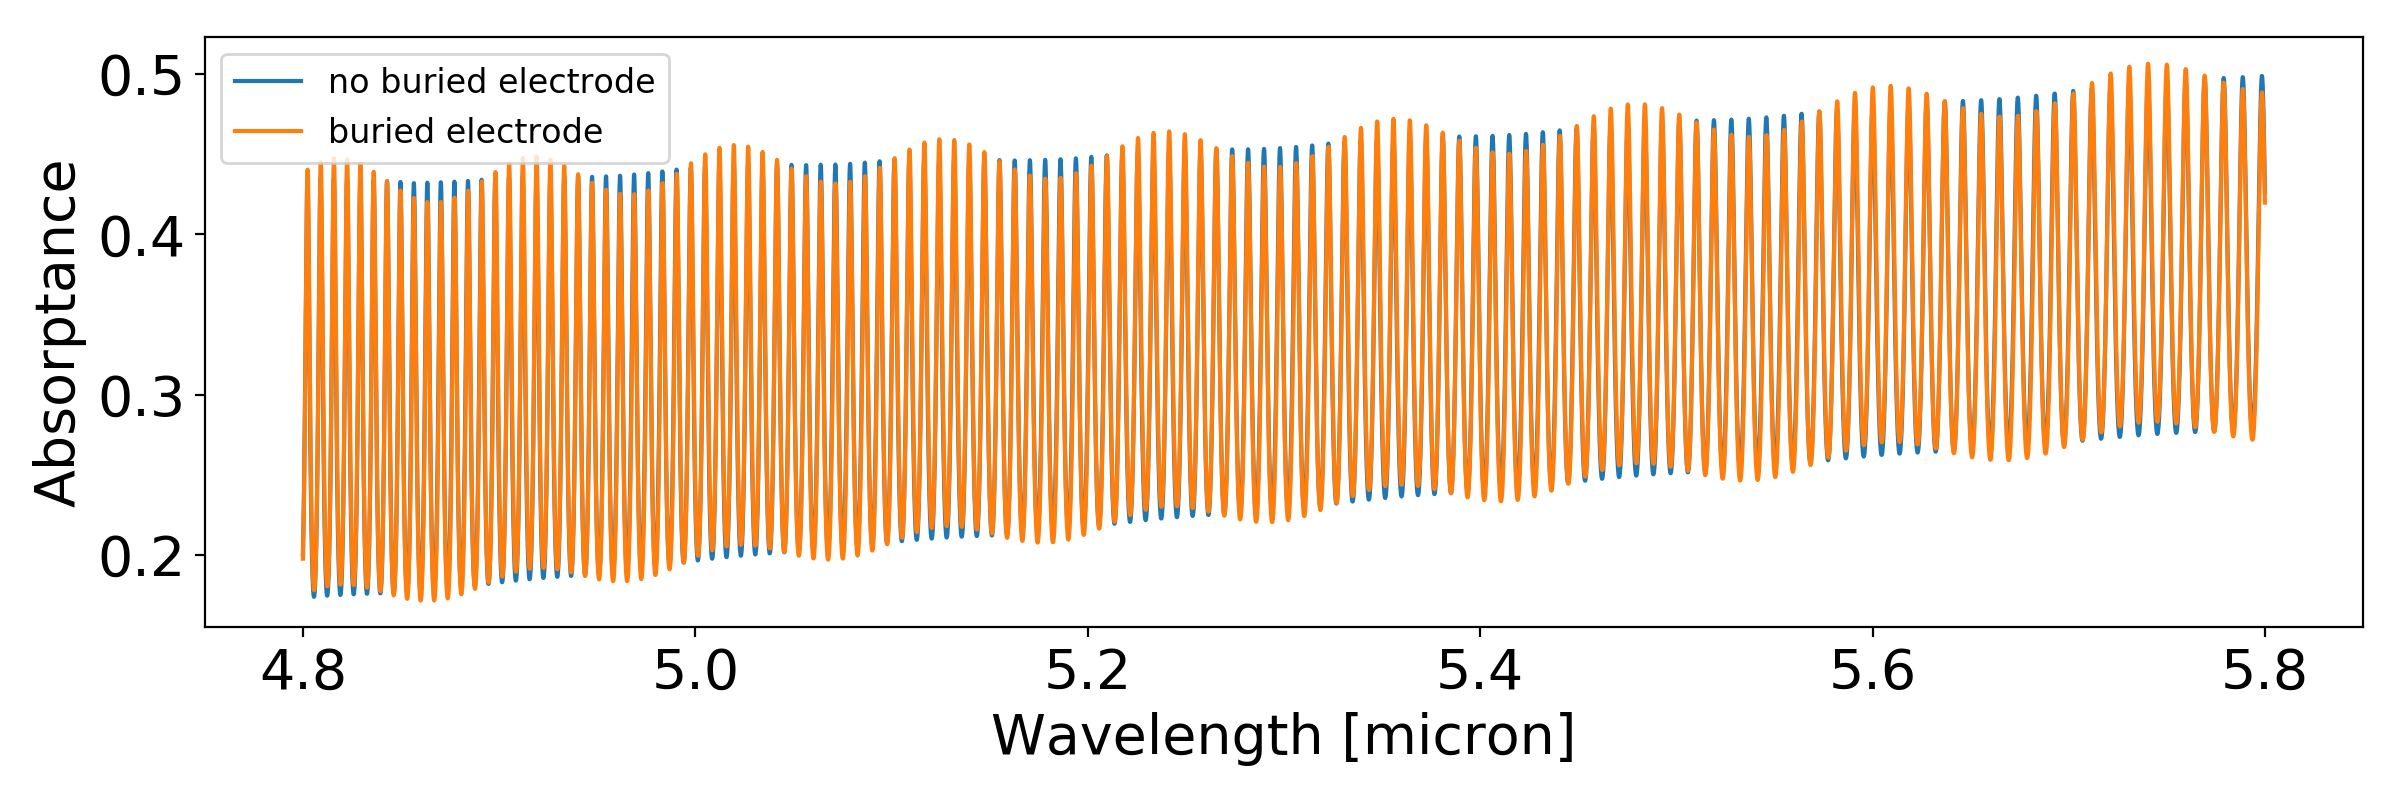

In [16]:
band = '1A'
Refl_woBuriedElectrode,Transm_woBuriedElectrode,Absorp_woBuriedElectrode = [np.zeros(len(wav[band])) for i in range(3)]
Refl_wBuriedElectrode,Transm_wBuriedElectrode,Absorp_wBuriedElectrode = [np.zeros(len(wav[band])) for i in range(3)]
for i,wvl in enumerate(wav[band]):
    # define stack of refractive layers
    n_list_woBuriedElectrode = [1,n_ZnS[band][i],n_Si[band][i],n_SiAs[band][i], n_Al[band][i]] # refractive index
    n_list_wBuriedElectrode = [1,n_ZnS[band][i],n_Si[band][i],n_BE[band][i],n_SiAs[band][i], n_Al[band][i]] # refractive index
    d_list_woBuriedElectrode = [np.inf, 0.65e3,465e3,35e3, np.inf] # thickness, nanometers
    d_list_wBuriedElectrode = [np.inf, 0.65e3,465e3,0.01e3,35e3, np.inf] # thickness, nanometers
    lambda_vac = wvl*1000 # convert microns to nanometers
    # solve the Fresnel equations using the Transfer-Matrix Method
    Refl_woBuriedElectrode[i],Transm_woBuriedElectrode[i],Absorp_woBuriedElectrode[i] =  funcs.simple_tmm(n_list_woBuriedElectrode, d_list_woBuriedElectrode, 0*deg, lambda_vac)
    Refl_wBuriedElectrode[i],Transm_wBuriedElectrode[i],Absorp_wBuriedElectrode[i] =  funcs.simple_tmm(n_list_wBuriedElectrode, d_list_wBuriedElectrode, 0*deg, lambda_vac)

plt.figure(figsize=(12,4))
plt.plot(wav[band],Absorp_woBuriedElectrode,label='no buried electrode')
plt.plot(wav[band],Absorp_wBuriedElectrode,label='buried electrode')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Absorptance')
plt.legend(loc='upper left',fontsize=12)
plt.tight_layout()

<IPython.core.display.Javascript object>


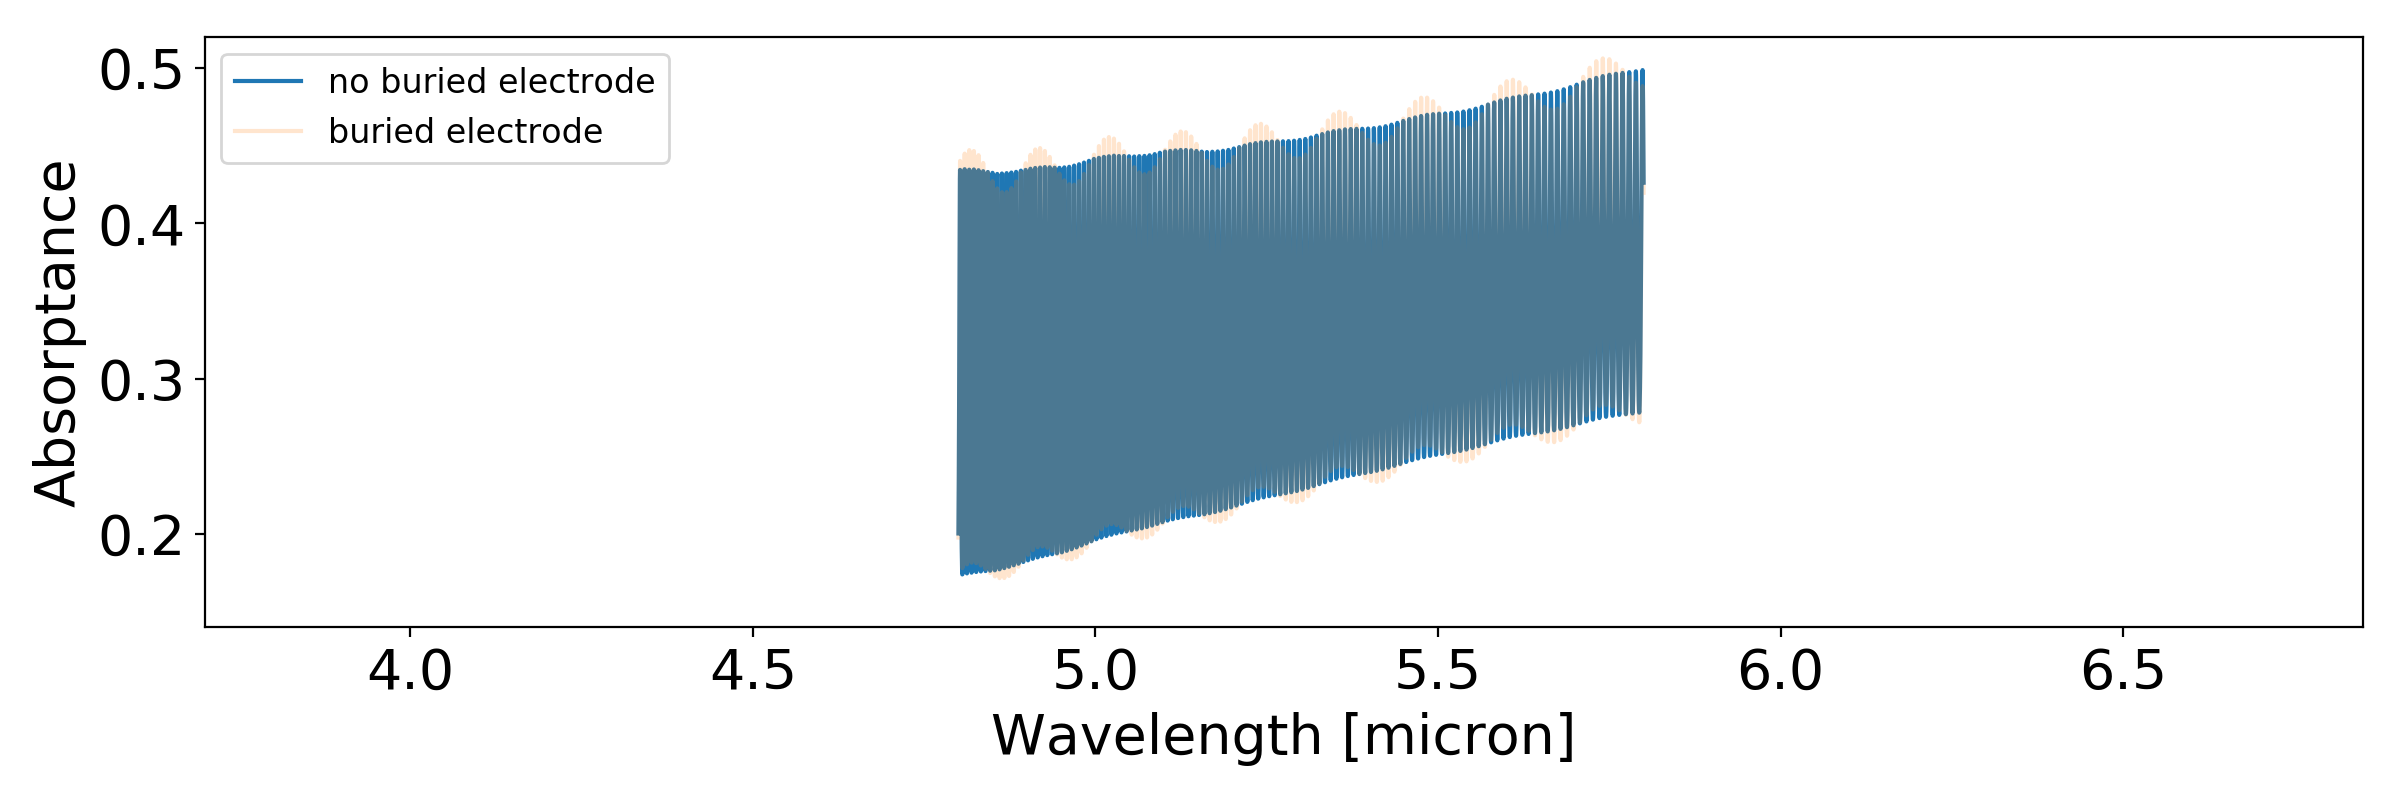

In [17]:
plt.figure(figsize=(12,4))
plt.plot(wav[band],Absorp_woBuriedElectrode,label='no buried electrode')
plt.plot(wav[band],Absorp_wBuriedElectrode,label='buried electrode',alpha=0.2)
plt.xlim(3.7,6.85)
plt.ylim(0.14,0.52)
plt.xlabel('Wavelength [micron]')
plt.ylabel('Absorptance')
plt.legend(loc='upper left',fontsize=12)
plt.tight_layout()

### Remarks:
* The effect of the buried electrode (transparent contact) is to increase the depth of the waviness caused by the Si:As layer. This is seen from the overlap of the orange peaks/troughs on top of the blue peaks/troughs.